In [1]:
import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly
plotly.offline.init_notebook_mode()
import datetime as dt
from datetime import date 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
inicio = dt.datetime(2012,11,12)
fim = date.today()

In [3]:
stock = input(str('Qual ação para prever, exemplo "PETR4.SA":'))

Qual ação para prever, exemplo "PETR4.SA":CIEL3.SA


In [4]:
#stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
dataset = web.DataReader(stock, 'yahoo', inicio, fim)
dataset = pd.DataFrame(dataset)
print(dataset.tail())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-11-23  23.559999  23.559999  23.160000  23.299999  23.299999  1435400.0
2017-11-24  23.440001  23.440001  23.049999  23.059999  23.059999  2089900.0
2017-11-27  23.030001  23.410000  22.650000  23.100000  23.100000  4510600.0
2017-11-28  23.379999  23.379999  22.900000  22.900000  22.900000  4863700.0
2017-11-29  23.129999  23.360001  22.879999  23.270000  23.270000  3715600.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2012-11-12 to 2017-11-29
Data columns (total 6 columns):
Open         1253 non-null float64
High         1253 non-null float64
Low          1253 non-null float64
Close        1253 non-null float64
Adj Close    1253 non-null float64
Volume       1253 non-null float64
dtypes: float64(6)
memory usage: 68.6 KB


In [6]:
dataset.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
dataset["Open"] = dataset["Open"].fillna(dataset['Open'].mean())
dataset["High"] = dataset["High"].fillna(dataset['High'].mean())
dataset["Low"] = dataset["Low"].fillna(dataset['Low'].mean())
dataset["Close"] = dataset["Close"].fillna(dataset['Close'].mean())
dataset["Adj Close"] = dataset["Adj Close"].fillna(dataset['Adj Close'].mean())
dataset["Volume"] = dataset["Volume"].fillna(dataset['Volume'].mean())

In [8]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-12,13.0401,13.2379,12.9509,13.0691,9.328717,8070866.0
2012-11-13,13.0449,13.1872,12.9606,13.1414,9.380323,4125220.0
2012-11-14,13.0232,13.1800,12.9967,13.0908,9.344208,4321797.0
2012-11-16,13.0232,13.3005,12.9606,13.2620,9.466410,8587192.0
2012-11-19,13.1293,13.2837,13.1293,13.2788,9.478400,4693386.0


In [9]:
# reset_index() para tira index
dataset.reset_index(inplace=True,drop=False)

In [10]:
print(dataset.head())

        Date     Open     High      Low    Close  Adj Close     Volume
0 2012-11-12  13.0401  13.2379  12.9509  13.0691   9.328717  8070866.0
1 2012-11-13  13.0449  13.1872  12.9606  13.1414   9.380323  4125220.0
2 2012-11-14  13.0232  13.1800  12.9967  13.0908   9.344208  4321797.0
3 2012-11-16  13.0232  13.3005  12.9606  13.2620   9.466410  8587192.0
4 2012-11-19  13.1293  13.2837  13.1293  13.2788   9.478400  4693386.0


In [11]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,22.713455,22.998862,22.400373,22.721205,20.842950,6.652082e+06
std,4.565446,4.608572,4.483066,4.555695,5.345134,3.715625e+06
min,13.023200,13.180000,12.912300,13.020800,9.294240,0.000000e+00
25%,19.389500,19.600675,19.245526,19.447300,16.273797,4.365683e+06
50%,23.333300,23.612499,23.022500,23.314150,22.193869,5.961670e+06
75%,25.925900,26.303849,25.646075,26.041700,24.511715,8.164498e+06
max,31.597200,32.131901,31.534700,31.805599,29.806112,3.935399e+07


In [12]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998375,0.998303,0.996543,0.984369,-0.182447
High,0.998375,1.000000,0.998235,0.998600,0.986492,-0.170491
Low,0.998303,0.998235,1.000000,0.998532,0.985626,-0.198588
Close,0.996543,0.998600,0.998532,1.000000,0.986829,-0.184484
Adj Close,0.984369,0.986492,0.985626,0.986829,1.000000,-0.164581
Volume,-0.182447,-0.170491,-0.198588,-0.184484,-0.164581,1.000000


In [13]:
# Esse método retorna o valor de simetria de cada coluna do dataset.
dataset.skew() 

Open        -0.472345
High        -0.485117
Low         -0.466650
Close       -0.471640
Adj Close   -0.703653
Volume       2.440877
dtype: float64

In [14]:
dataset['Variation'] = dataset['Close'].sub(dataset['Open'])

In [15]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Variation
1249,2017-11-23,23.559999,23.559999,23.160000,23.299999,23.299999,1435400.0,-0.260000
1250,2017-11-24,23.440001,23.440001,23.049999,23.059999,23.059999,2089900.0,-0.380002
1251,2017-11-27,23.030001,23.410000,22.650000,23.100000,23.100000,4510600.0,0.069999
1252,2017-11-28,23.379999,23.379999,22.900000,22.900000,22.900000,4863700.0,-0.479999
1253,2017-11-29,23.129999,23.360001,22.879999,23.270000,23.270000,3715600.0,0.140001


In [16]:
x1 = dataset.Date
y1 = dataset.Close
#data = [go.Scatter(x=data.Date, y=data.Close)]
data1 = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['11-21-2016','11-16-2017'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor da Acao'
   ))
fig = go.Figure(data = data1, layout = layout)
py.iplot(fig)

In [17]:
dataset2 = dataset.head(7)
dados = go.Candlestick(x = dataset2.Date,
                       open = dataset2.Open,
                       high = dataset2.High,
                       low = dataset2.Low,
                       close = dataset2.Close,
                       )

data2 = [dados]
py.offline.iplot(data2,filename='grafico_candlestick')

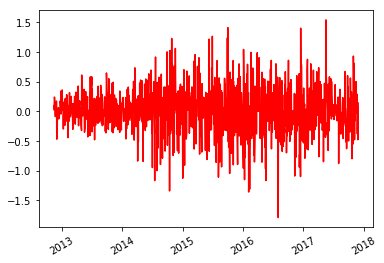

In [18]:
import matplotlib.dates as mdates
import datetime as dt
x_ = dataset['Date']
y_ = dataset['Variation']
plt.plot_date(x_,y_, color='r',fmt="r-")
plt.xticks(rotation=30)
plt.show()

Correlação de Features e classe

In [19]:
treino = dataset

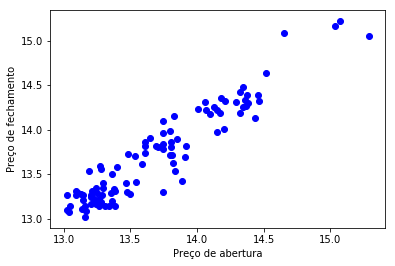

In [20]:
x = treino.Open[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Preço de abertura')
plt.ylabel('Preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

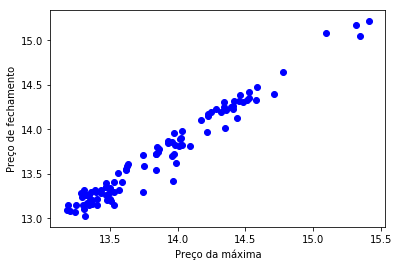

In [21]:
x = treino.High[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Preço da máxima')
plt.ylabel('Preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

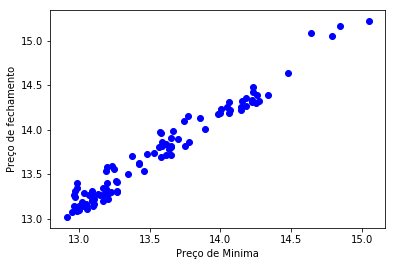

In [22]:
x = treino.Low[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Preço de Minima')
plt.ylabel('Preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

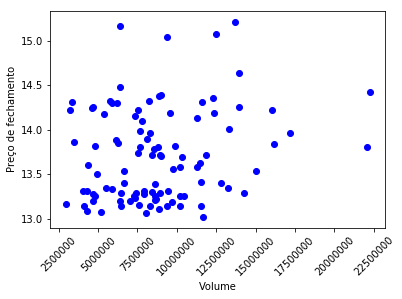

In [23]:
x = treino.Volume[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Volume')
plt.ylabel('Preço de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()



Modelo


In [24]:
features = ['Open','High','Low','Volume']
treino = treino[features]

In [25]:
treino.head()

,Open,High,Low,Volume
0,13.0401,13.2379,12.9509,8070866.0
1,13.0449,13.1872,12.9606,4125220.0
2,13.0232,13.1800,12.9967,4321797.0
3,13.0232,13.3005,12.9606,8587192.0
4,13.1293,13.2837,13.1293,4693386.0


In [26]:
y = dataset['Close']



Fazendo Predições


In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino, y,random_state=42)

In [28]:
X_treino.head()

,Open,High,Low,Volume
909,30.833300,30.875000,30.166700,4935600.0
139,15.364600,15.422500,15.046300,6830438.0
780,23.583300,23.722200,22.590300,9720864.0
921,29.924999,30.133301,29.299999,5957040.0
224,18.150999,18.336201,17.939800,5098291.0


In [29]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr_model.coef_

array([ -5.22381037e-01,   7.89271449e-01,   7.35038003e-01,
         4.44509207e-10])

Comparando os resultados - Dados da tabela

In [32]:
real = [(y_teste[:10])]
real

[1253    23.270000
 101     15.191000
 51      13.580200
 63      13.717700
 1069    22.341700
 812     22.972200
 220     17.939800
 478     21.788200
 922     29.333300
 931     28.266701
 Name: Close, dtype: float64]

In [33]:
predito = [(lr_model.predict(X_teste)[:10])]
predito

[array([ 23.1368694 ,  15.27084381,  13.42198217,  13.70498562,
         22.42185446,  22.88481241,  17.88798076,  22.0192188 ,
         29.56775708,  28.42614001])]

In [34]:
tabela  = pd.DataFrame(predito + real)
tabela

,0,1,2,3,4,5,6,7,8,9
0,23.136869,15.270844,13.421982,13.704986,22.421854,22.884812,17.887981,22.019219,29.567757,28.426140
1,23.270000,15.191000,13.580200,13.717700,22.341700,22.972200,17.939800,21.788200,29.333300,28.266701


Validando o modelo

In [35]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

0.16720263640505847

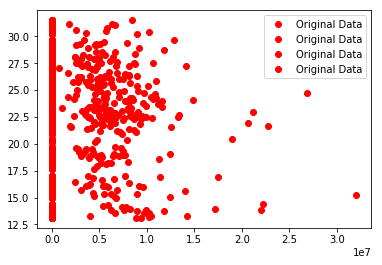

In [36]:
plt.plot(X_teste, y_teste, 'ro', label = 'Original Data')
plt.legend()
plt.show()

Da pra melhorar o modelo?



Teste com Open e High


In [37]:
lr_model2 = LinearRegression()

In [38]:
features = ['Open','High']
treino2 = treino[features]

In [39]:
treino2.head()

,Open,High
0,13.0401,13.2379
1,13.0449,13.1872
2,13.0232,13.1800
3,13.0232,13.3005
4,13.1293,13.2837


In [40]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino2, y, test_size=0.33, random_state=42)

In [41]:
lr_model2.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
lr_model2.coef_

array([-0.14963929,  1.13397474])

In [43]:
RMSE = mean_squared_error(y_teste, lr_model2.predict(X_teste))**0.5
RMSE

0.24514308408046628